# House Prices Linear Regression Model

## Installing the Packages

In [106]:
!pip install seaborn numpy pandas matplotlib scikit-learn joblib

## Importing Packages

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.metrics import mean_absolute_error , mean_squared_error, r2_score
import joblib
import pickle as pk

## Reading in the Data

In [112]:
df = pd.read_csv('housing.csv')
pd.concat([df.head(),df.tail()])

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND
20639,-121.24,39.37,16.0,2785.0,616.0,1387.0,530.0,2.3886,89400.0,INLAND


## Data Accessing

In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [114]:
df.shape

(20640, 10)

In [115]:
df["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

In [116]:
## Checking Null Values in dataframe column
df[df['total_bedrooms'].isnull() == True].head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
290,-122.16,37.77,47.0,1256.0,NaN,570.0,218.0,4.3750,161900.0,NEAR BAY
341,-122.17,37.75,38.0,992.0,NaN,732.0,259.0,1.6196,85100.0,NEAR BAY
538,-122.28,37.78,29.0,5154.0,NaN,3741.0,1273.0,2.5762,173400.0,NEAR BAY
563,-122.24,37.75,45.0,891.0,NaN,384.0,146.0,4.9489,247100.0,NEAR BAY
696,-122.10,37.69,41.0,746.0,NaN,387.0,161.0,3.9063,178400.0,NEAR BAY


In [117]:
## Total numbers of rows with missing values in the data
sum(df["total_bedrooms"].isnull())

207

In [118]:
## Ratio of missing values rows to the total length of the data
round(sum(df['total_bedrooms'].isnull()) / len(df),2) * 100

1.0

In [119]:
## checking if there is duplicates in data
sum(df.duplicated())

0

In [120]:
## Statistical Anylasis of the data
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [121]:
## Statistical Anylasis of the data
df.iloc[:,2:].describe()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Exploratory Data Analysis(EDA)

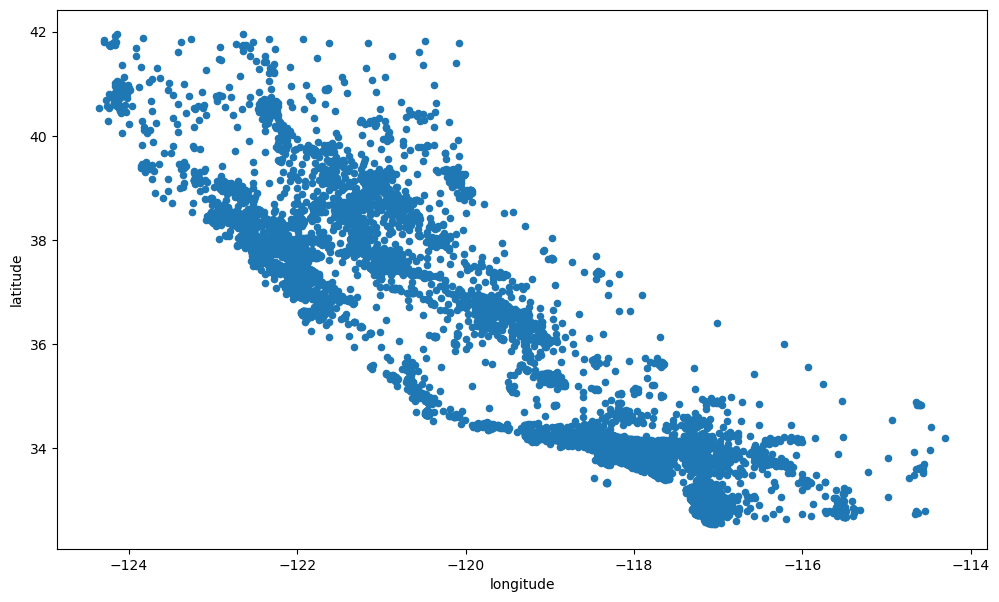

In [84]:
df.plot(kind = 'scatter',figsize = (12,7),x='longitude',y='latitude');

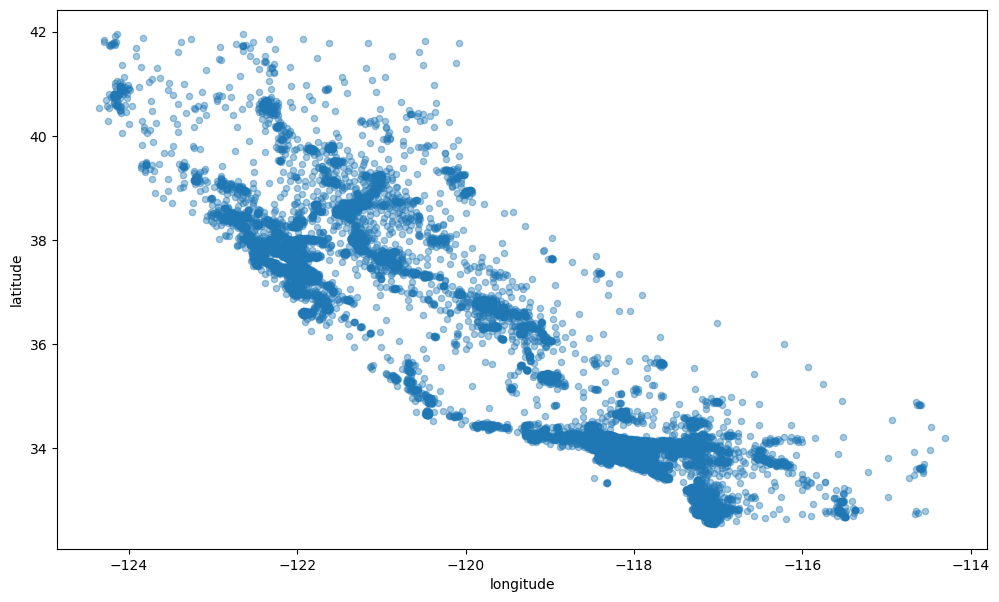

In [85]:
df.plot(kind = 'scatter',figsize = (12,7),x='longitude',y='latitude',alpha = 0.4 );

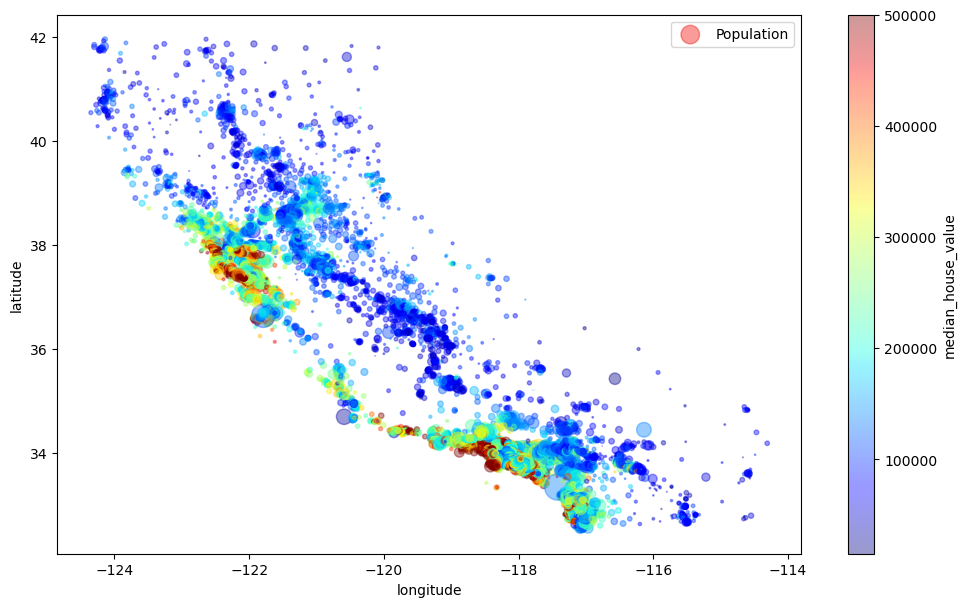

In [86]:
df.plot(kind = 'scatter',
        x='longitude',
        y='latitude',
        figsize = (12,7),
        alpha = 0.4,
        s = df['population']/100,
        label = 'Population',
        c='median_house_value',
        cmap=plt.get_cmap('jet'));

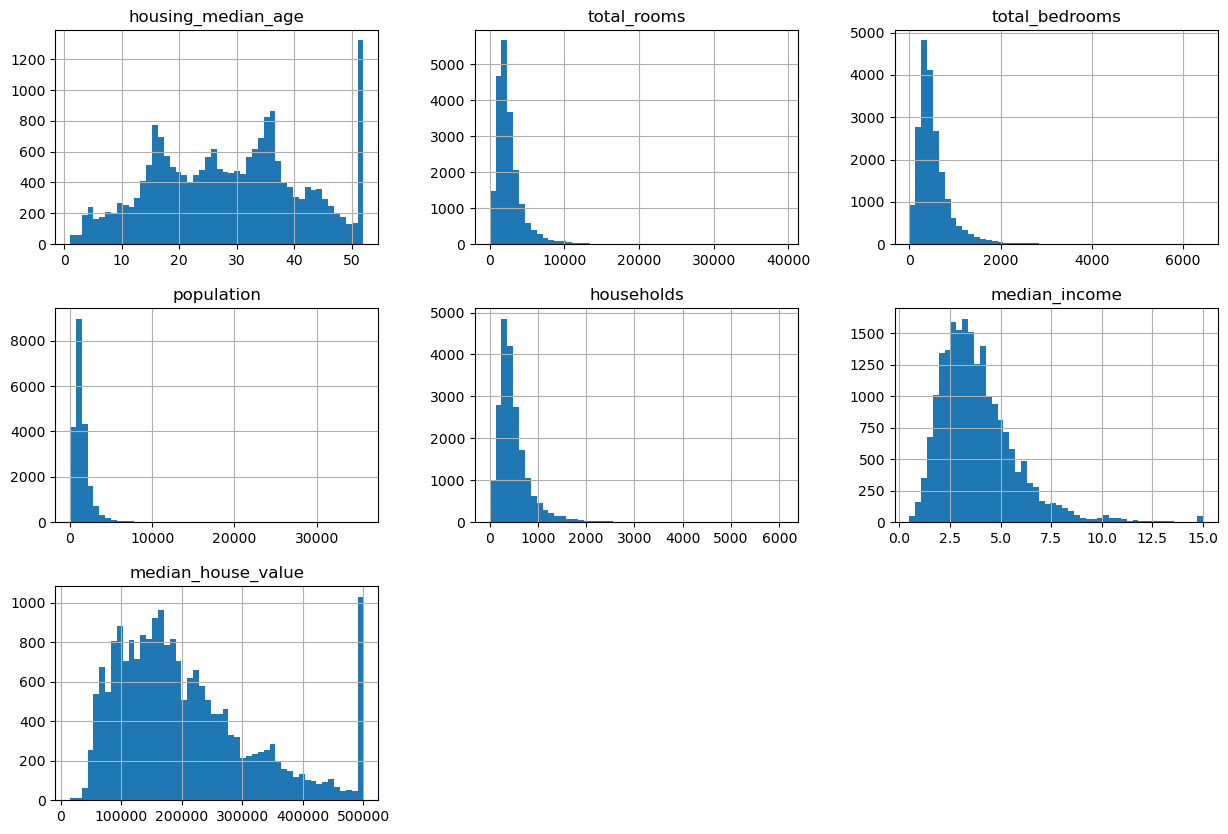

In [87]:
df.iloc[:,2:].hist(bins=50,figsize=(15,10));

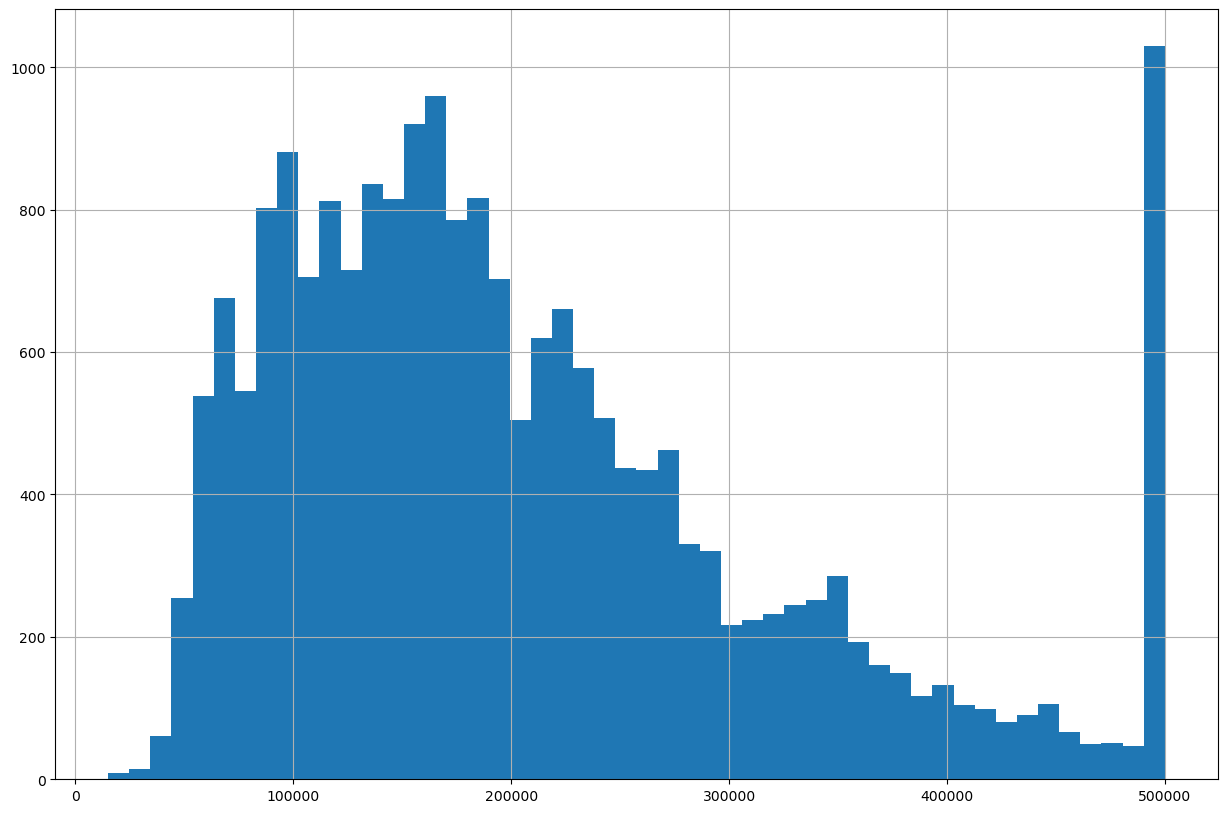

In [88]:
df['median_house_value'].hist(bins=50,figsize=(15,10)) ;

In [89]:
sum(df['median_house_value'] >= 500000)

992

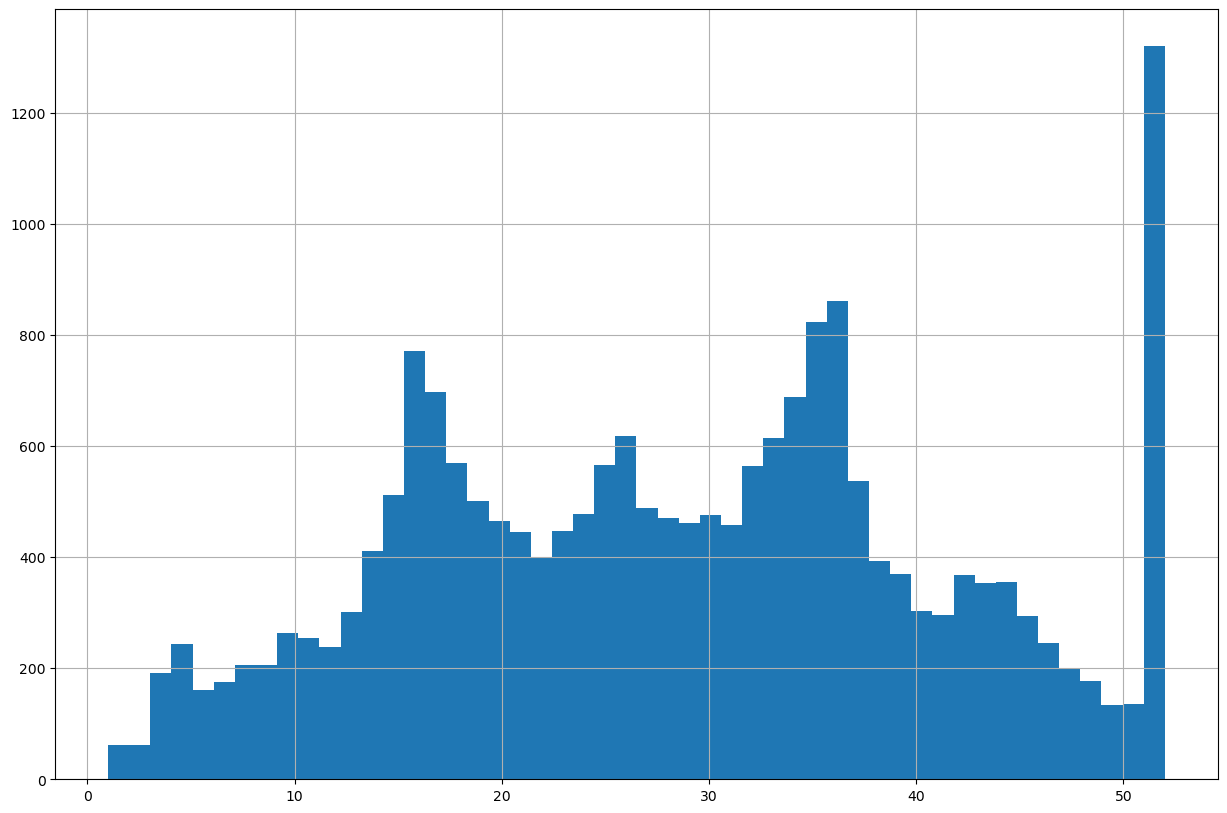

In [90]:
df['housing_median_age'].hist(bins=50,figsize=(15,10));

In [91]:
# finding outliers
sum(df['housing_median_age'] >= 50)

1457

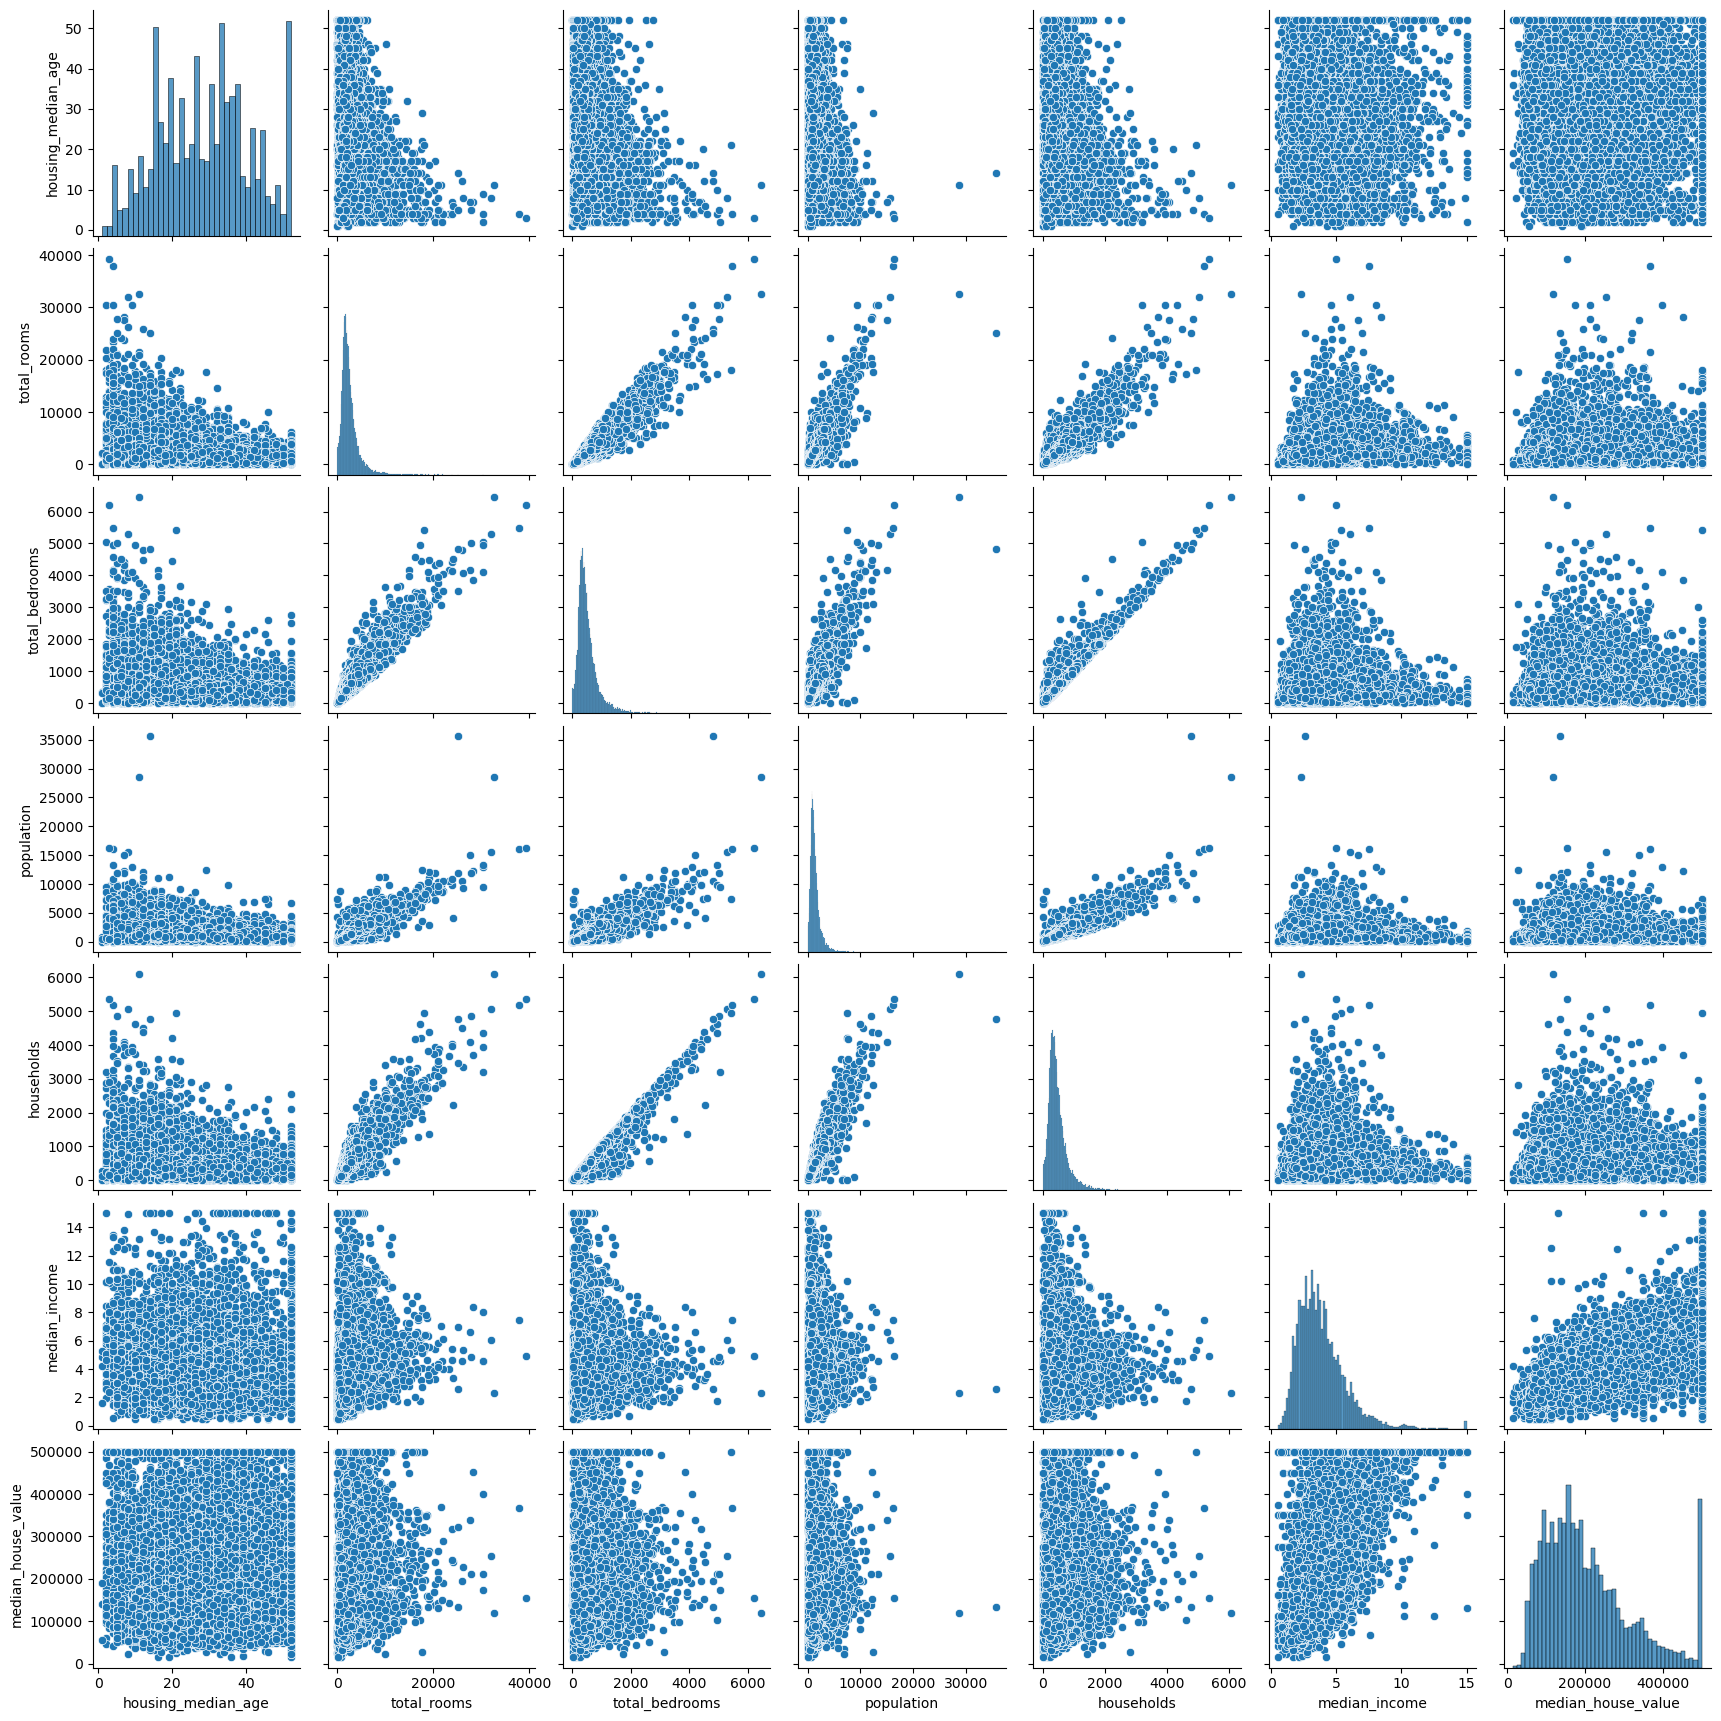

In [92]:
sns.pairplot(df.iloc[:, 2:]);

C:\Users\jasse\AppData\Local\Temp\ipykernel_14892\1609965413.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.iloc[:,2:].corr(),annot=True)


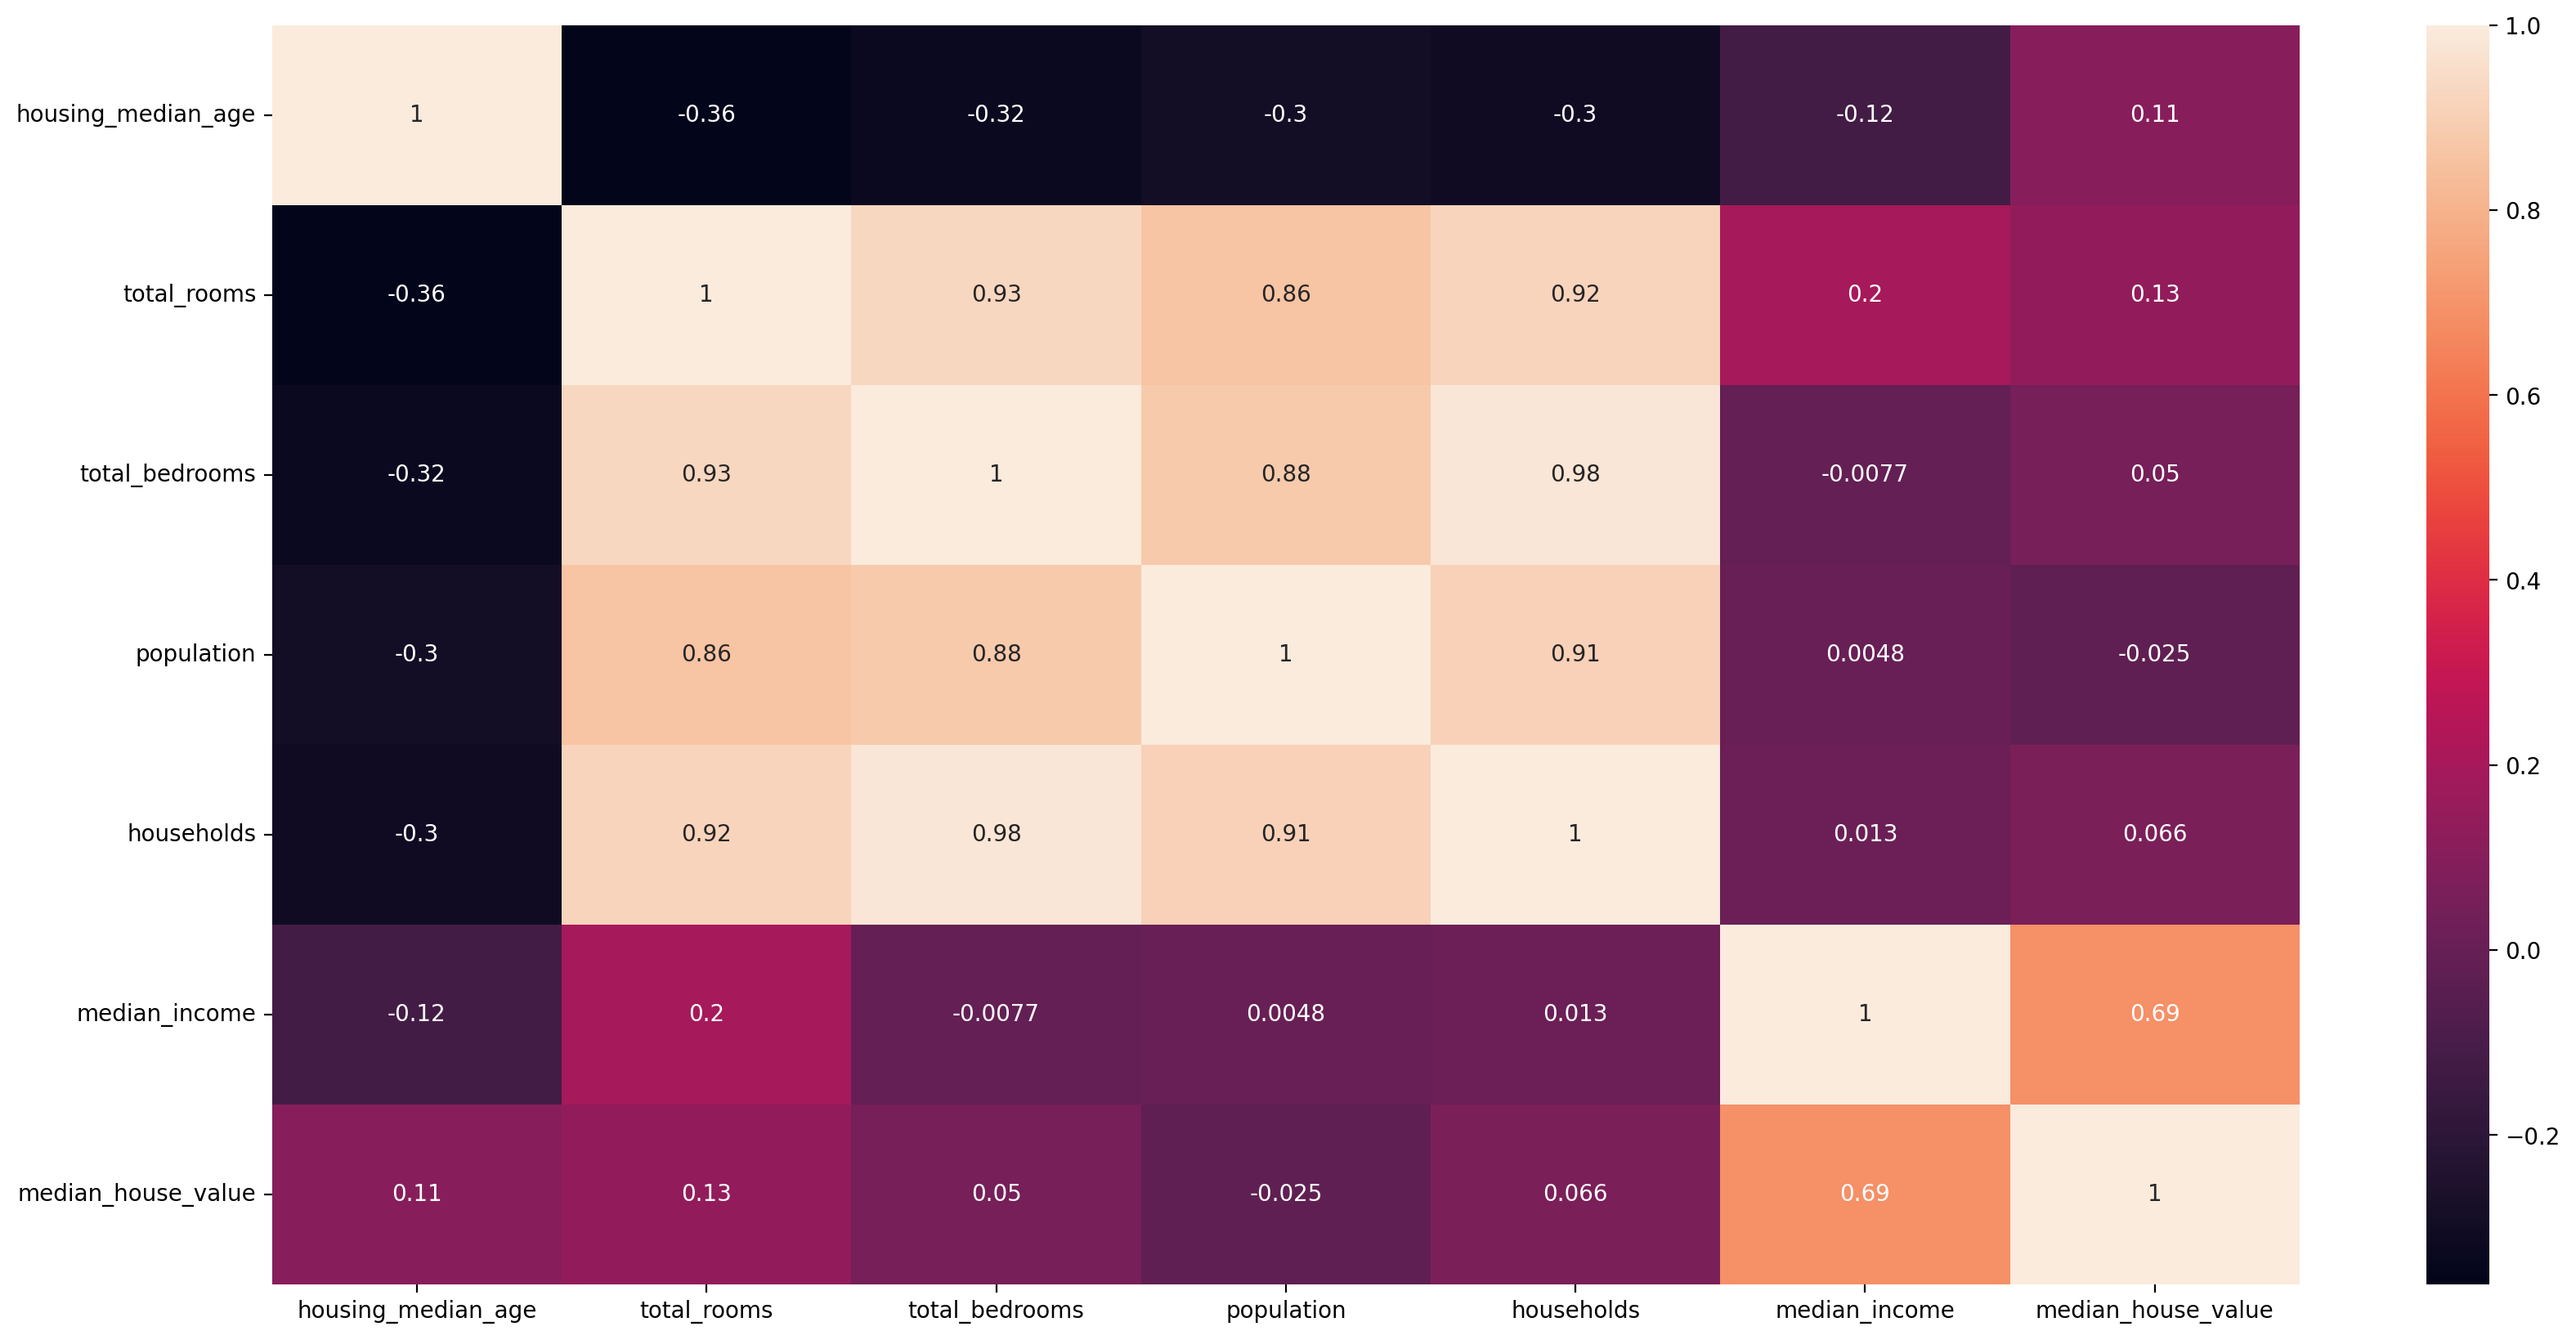

In [93]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(df.iloc[:,2:].corr(),annot=True)
plt.show()

## Data Preparation

In [94]:
## Data Cleaning
# 1. Dropping Null values
df.dropna(axis=0,inplace=True)


# 2. Handling outliers in "house_median_age"
df.drop(df[df['housing_median_age'] > 51].index,axis=0,inplace=True)

# 3.Handling outliers in "median_house_value"
df.drop(df[df['median_house_value'] > 490000].index,axis=0,inplace=True)

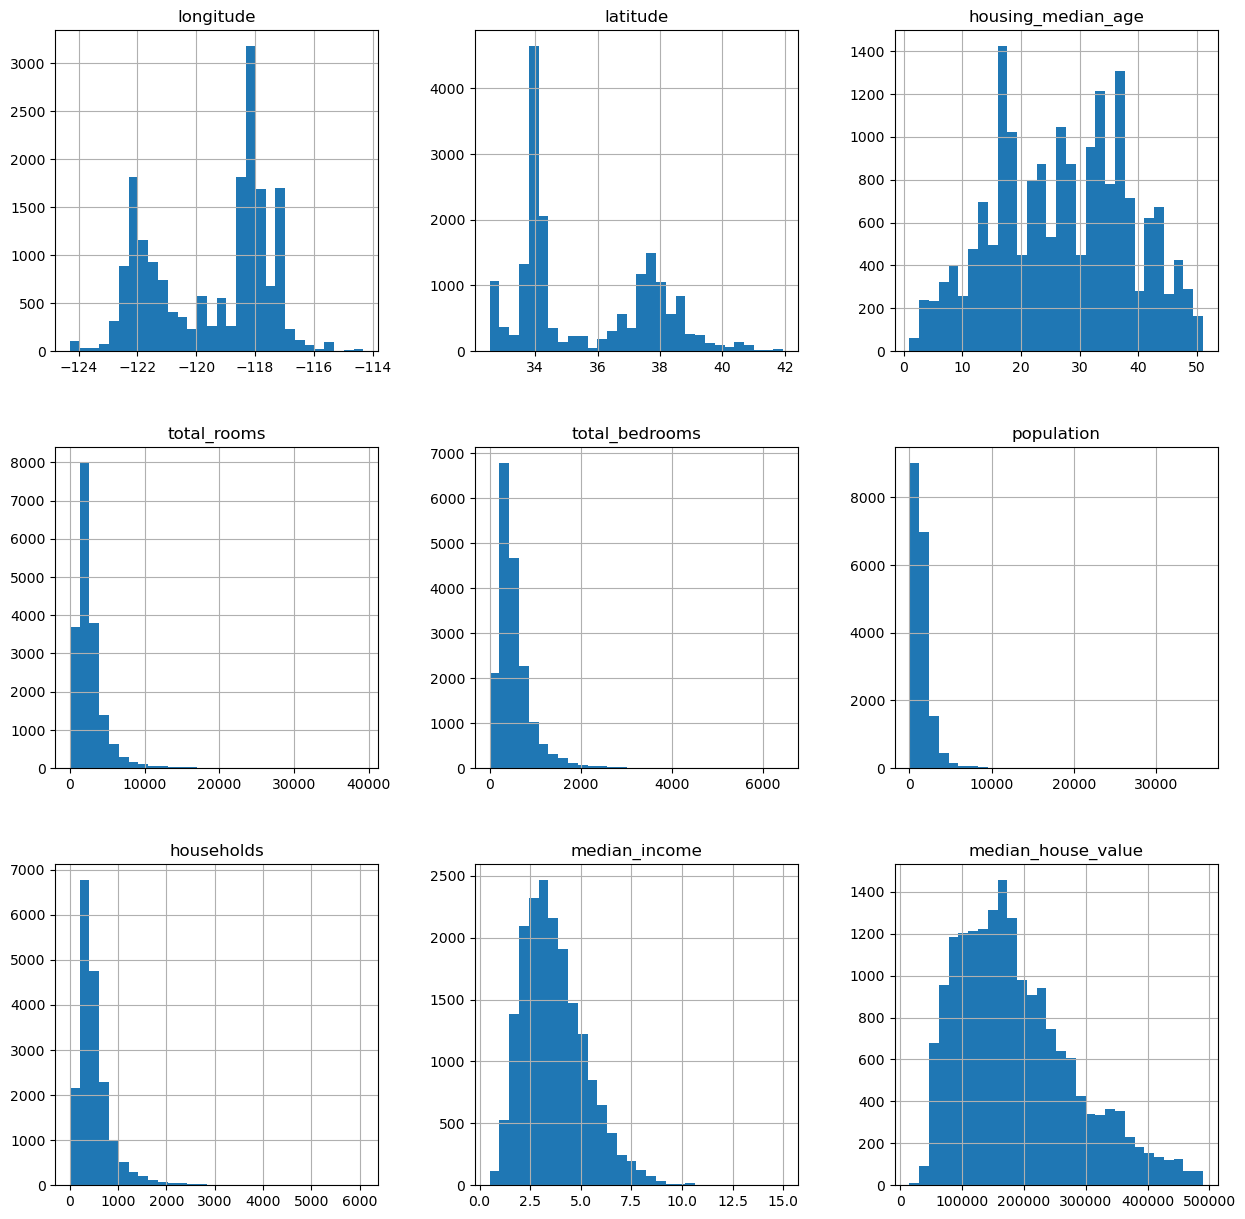

In [95]:
df.hist(bins=30,figsize=(15,15));

In [96]:
## Handling Categorical
df['ocean_proximity'].unique()


array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [97]:
df = pd.get_dummies(data=df,columns=['ocean_proximity'],drop_first=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
15,-122.26,37.85,50.0,1120.0,283.0,697.0,264.0,2.1250,140000.0,0,0,1,0
18,-122.26,37.84,50.0,2239.0,455.0,990.0,419.0,1.9911,158700.0,0,0,1,0


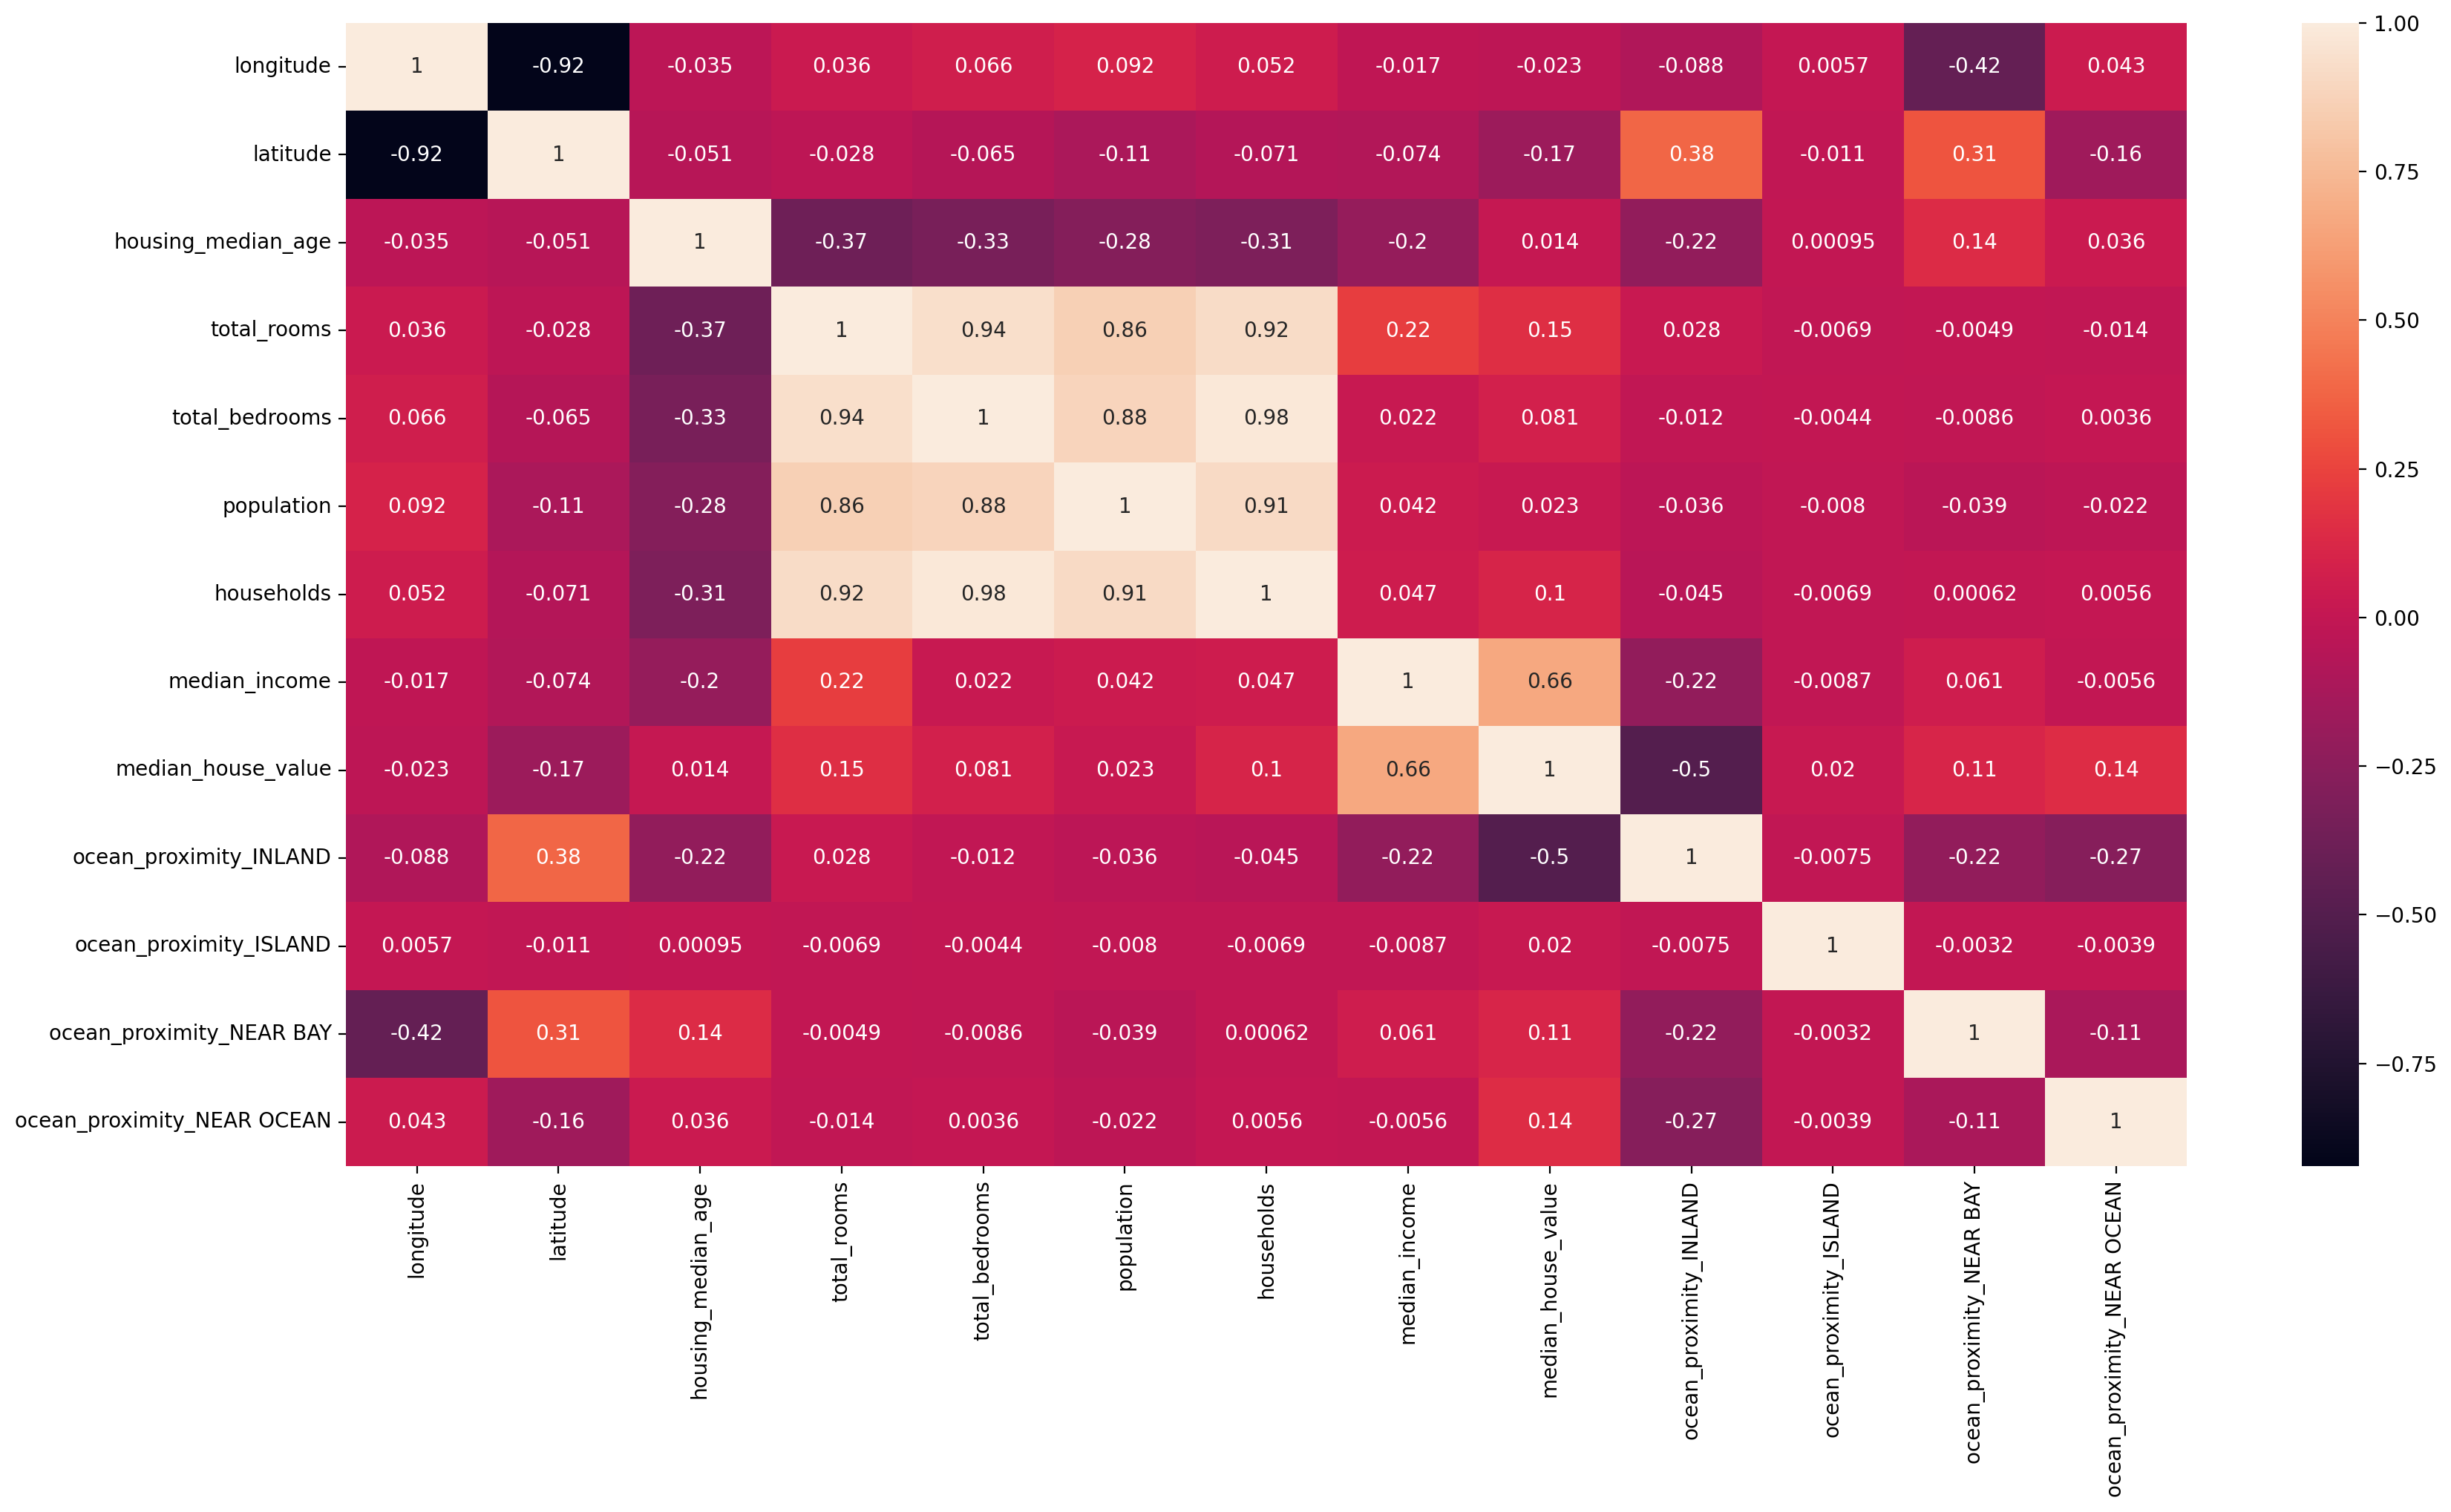

In [98]:
plt.figure(figsize=(20,10),dpi=200)
sns.heatmap(df.corr(),annot=True);

In [99]:
# Feature Scaling
scaler = StandardScaler()
scaled_input = scaler.fit_transform(df.drop("median_house_value",axis=1))

In [100]:
scaled_input

array([[-1.3855279 ,  1.0629567 ,  1.22733661, ..., -0.01044646,
         3.29597185, -0.37766983],
       [-1.38047934,  1.05364922, -0.52129941, ..., -0.01044646,
         3.29597185, -0.37766983],
       [-1.40067357,  1.04434174,  1.31476841, ..., -0.01044646,
         3.29597185, -0.37766983],
       ...,
       [-0.87562357,  1.78428639, -0.87102662, ..., -0.01044646,
        -0.30340065, -0.37766983],
       [-0.92610915,  1.78428639, -0.78359482, ..., -0.01044646,
        -0.30340065, -0.37766983],
       [-0.88572068,  1.75636395, -0.95845842, ..., -0.01044646,
        -0.30340065, -0.37766983]])

In [101]:
X = scaled_input
y = df['median_house_value'].values
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

## Model training

In [125]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_model.score(X_train,y_train)

0.6262265744434913

In [103]:
preds = lr_model.predict(X_test)
print(f'MAE = {mean_absolute_error(preds,y_test)}')
print(f'MSE = {mean_squared_error(preds,y_test)}')
print(f'R2 Score = {r2_score(preds,y_test)}')

MAE = 42330.15439870539
MSE = 3333676628.507755
R2 Score = 0.416927423320804


## Model Saving

In [105]:
with open('lr_model.plk','wb') as f:
    pk.dump(lr_model,f)